### Prelim Analysis

Work with original data (BEFORE RESAMPLING) to:

1. Look at distribution of Fraud cases over the years (plot - bar plot)
2. Relationship between Errors and Fraud cases
3. Look for any patterns in common for fraud cases (keep all columns)

https://plotly.com/python/bar-charts/


In [2]:
#Import dependencies
import pandas as pd

In [3]:
df=pd.read_csv('card_transaction.v1.csv')

In [4]:
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [5]:
df.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?'],
      dtype='object')

In [6]:
df.describe()

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.223292e+18,9.992800e+04,9.402000e+03


### Create dataframe with Fraudulent transactions

In [7]:
#Separate Fraudulent/non-fraudulent data --> create 2 dataframes
df_no_fraud=df.loc[(df["Is Fraud?"] == "No")]
df_fraud=df.loc[(df["Is Fraud?"] == "Yes")]

In [8]:
# df_fraud=df_fraud.set_index(['Is Fraud?'])
df_fraud.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4099,0,0,2015,11,15,12:55,$287.13,Online Transaction,-8194607650924472520,ONLINE,NaN,NaN,3001,NaN,Yes
4100,0,0,2015,11,15,13:19,$2.41,Online Transaction,-7759074308363763111,ONLINE,NaN,NaN,5651,NaN,Yes
4101,0,0,2015,11,16,09:41,$50.81,Online Transaction,-551332107213382088,ONLINE,NaN,NaN,4411,NaN,Yes
4102,0,0,2015,11,16,09:46,$248.36,Online Transaction,4872340518840476610,ONLINE,NaN,NaN,5732,NaN,Yes
4103,0,0,2015,11,16,11:20,$473.00,Online Transaction,-8566951830324093739,ONLINE,NaN,NaN,3640,NaN,Yes


In [9]:
#Number of fraudulent transactions
fraud_count=df_fraud.shape[0]   #0 is for nb of rows
print('Number of fraudulent transactions is: ',fraud_count)

Number of fraudulent transactions is:  29757


### Identifying key features

In [10]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [20, 10]

In [14]:
# # Create a sample dataframe with an text index
# plotdata = pd.DataFrame(df_fraud['Is Fraud?'],index=df_fraud['Year'])

# # Plot a bar chart
# plotdata.plot(kind="bar")

In [65]:
# Get the total number of transactions for each Year
total_fraud_year = df_fraud.groupby(['Year']).count()['Is Fraud?'].to_frame()
# total_fraud_year.plot.barh()
total_no_fraud_year=df_no_fraud.groupby(['Year']).count()['Is Fraud?'].to_frame()

In [109]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(y=total_no_fraud_year['Is Fraud?'],
                x=total_no_fraud_year.index,
                name='not fraudulent',
                marker_color='white'
                ))
fig.add_trace(go.Bar(y=total_fraud_year['Is Fraud?'],
                x=total_fraud_year.index,
                name='fraudulent',
                marker_color='red'
                ))

fig.update_layout(
    title='Fraudulent vs. Non-Fraudulent Transactions over time',
    xaxis=dict(
        tickfont_size=14,
        dtick=1
    ),
    
    yaxis=dict(
        title='Number of Transactions',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='stack',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
fig.write_html("bar_year.html")

In [110]:
fig = go.Figure()

fig.add_trace(go.Bar(y=total_fraud_year['Is Fraud?'],
                x=total_fraud_year.index,
                name='non fraudulent',
                marker_color='red'
                ))

fig.update_layout(
    title='Fraudulent Transactions',
    xaxis=dict(
        tickfont_size=14,
        dtick=1
    ),
    
    yaxis=dict(
        title='Number of Transactions',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='stack',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
fig.write_html("bar_fraud.html")

### Creat Bar Chart Race for interactive element 

In [55]:
# import statistics as stat
# import bar_chart_race as bcr


# bcr.bar_chart_race(df=total_fraud_year, title="Total fraud per year", orientation='h',bar_label_size=8,tick_label_size=6, title_size=12,dpi=300, steps_per_period=20, figsize=(4,4), cmap='set1', fixed_max=True)

C:\Users\khawl\New folder\envs\PythonData\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\khawl\New folder\envs\PythonData\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            Requested MovieWriter (ffmpeg) not available
                            

In [32]:
# Get the total number of transactions for each Day
total_fraud_day = df_fraud.groupby(['Day']).count()['Is Fraud?'].to_frame()
# total_fraud_day.plot.barh()

In [100]:

fig = go.Figure()
fig.add_trace(go.Bar(y=total_fraud_day['Is Fraud?'],
                x=total_fraud_day.index,
                name='Rest of world',
                marker_color='rgb(55, 83, 109)'
                ))
# fig.add_trace(go.Bar(x=years,
#                 y=[16, 13, 10, 11, 28, 37, 43, 55, 56, 88, 105, 156, 270,
#                    299, 340, 403, 549, 499],
#                 name='China',
#                 marker_color='rgb(26, 118, 255)'
#                 ))

fig.update_layout(
    title='Fraudulent Activity Monthly Pattern',
    xaxis=dict(
        title='Day',
        tickfont_size=14,
        dtick=1
    ),
    
    yaxis=dict(
        title='Number of Transactions',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='relative',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
bar_fraud_day=fig

In [33]:
cols_to_keep = ['Amount', 'Card', 'Year', 'Month', 'Day', 'MCC', 'IsFraud?']

In [69]:
df1=total_fraud_day = df_fraud.groupby(['Day']).count()['Is Fraud?']

In [70]:
df1.describe()
#focus on last 2 days of the month - centrist dataset - no outliers, constant fraudulent transaction

count      31.000000
mean      959.903226
std        96.374047
min       649.000000
25%       912.500000
50%       940.000000
75%      1028.500000
max      1165.000000
Name: Is Fraud?, dtype: float64

<AxesSubplot:ylabel='Time'>

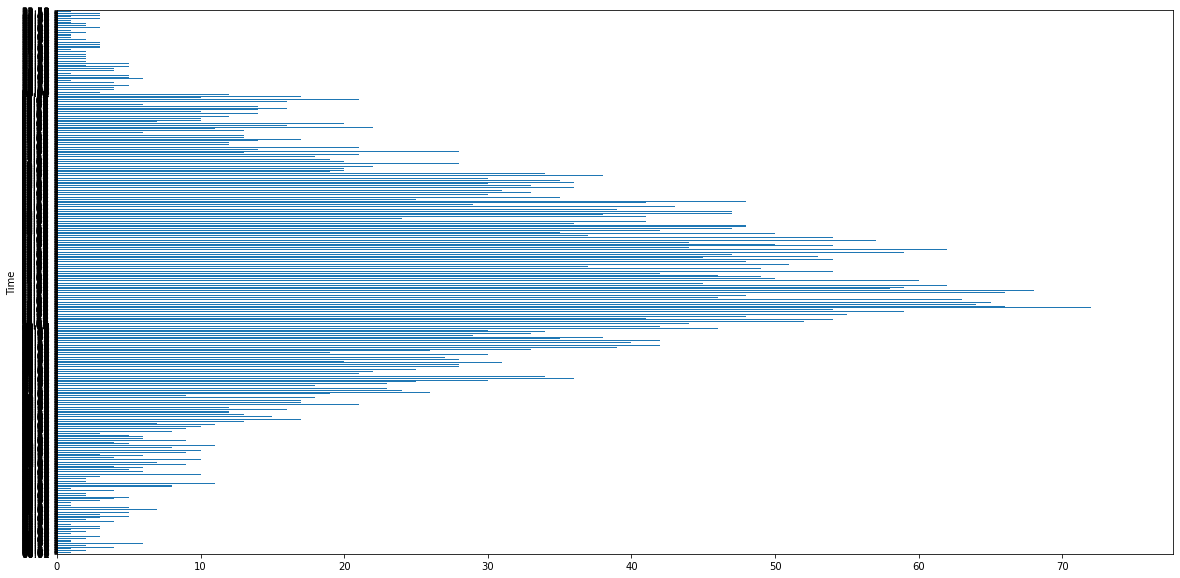

In [37]:
# Get the total transactions for each Time   ----> CREATE BINS - 24 
total_fraud_time = df_fraud.groupby(['Time']).count()['Is Fraud?']
total_fraud_time.plot.barh()

In [57]:
# Get the total transactions Based on Chip
total_fraud_chip = df_fraud.groupby(['Use Chip']).count()['Is Fraud?'].to_frame()

In [111]:
import plotly.express as px
pie_chip = px.pie(total_fraud_chip, values=total_fraud_chip['Is Fraud?'], names=total_fraud_chip.index)
pie_chip.show()

pie_chip.write_html("pie_chip.html")

In [92]:
# # Get the total transactions for merchant city
# total_fraud_merchant_city = df_fraud.groupby(['Merchant City']).count()['Is Fraud?'].plot.bar()
# plt.rcParams["figure.figsize"] = [20, 10]
# # plt.ylim(0,100)

In [61]:
# Get the total transactions for each  type of Error
total_fraud_errors = df_fraud.groupby(['Errors?']).count()['Is Fraud?'].to_frame()
# total_fraud_errors.plot.barh()

#BINS:
# bad pin
# insufficient balance
# technical glitch
# bad cvv
# bad experiation
# bad card number

In [112]:
pie_errors = px.pie(total_fraud_errors, values=total_fraud_errors['Is Fraud?'], names=total_fraud_errors.index)
pie_errors.show()
pie_errors.write_html("pie_errors.html")

In [93]:
# Get the total transactions for MCC
total_fraud_MCC = df_fraud.groupby(['MCC']).count()['Is Fraud?'].to_frame()


In [103]:
fig = go.Figure()
fig.add_trace(go.Bar(y=total_fraud_MCC['Is Fraud?'],
                x=total_fraud_MCC.index,
                name='MCC',
                marker_color='red'
                ))
# fig.add_trace(go.Bar(x=years,
#                 y=[16, 13, 10, 11, 28, 37, 43, 55, 56, 88, 105, 156, 270,
#                    299, 340, 403, 549, 499],
#                 name='China',
#                 marker_color='rgb(26, 118, 255)'
#                 ))

fig.update_layout(
    title='Fraudulent Activity by Business Type',
    xaxis=dict(
        title='Merchant Category Code (MCC)',
        tickfont_size=14,
    ),
    
    yaxis=dict(
        title='Number of Transactions',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

<AxesSubplot:xlabel='MCC'>

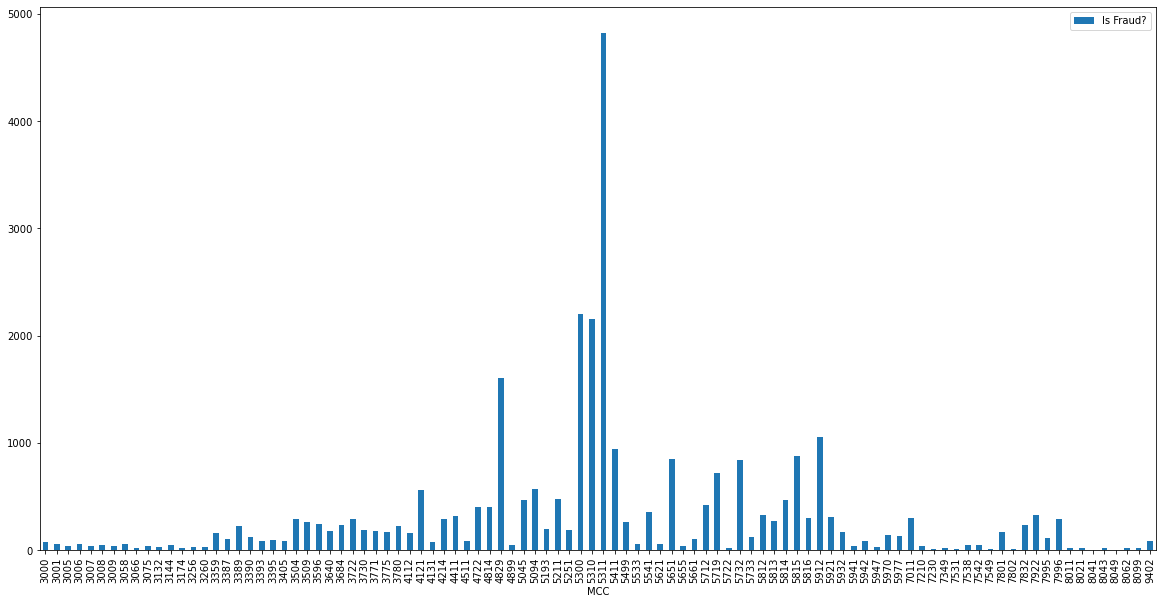

In [107]:
total_fraud_MCC.plot.bar()

In [98]:
# # Get the total transactions for Merchant State
# total_fraud_merchant_state = df_fraud.groupby(['Merchant State']).count()['Is Fraud?'].plot.barh()
# plt.rcParams["figure.figsize"] = [10, 20]

# #add bar chart for non-fraudulent data to see distribution - focus on italy.

In [99]:
# # Get the total transactions for Zip
# total_fraud_Zip = df_fraud.groupby(['Zip']).count()['Is Fraud?'].plot.bar()
# plt.ylim(0,50)
# plt.rcParams["figure.figsize"] = [1, 50]

In [113]:
# Get the total transactions for Card
total_fraud_card= df_fraud.groupby(['Card']).count()['Is Fraud?'].to_frame()
pie_card = px.pie(total_fraud_card, values=total_fraud_card['Is Fraud?'], names=total_fraud_card.index)
pie_card.show()

pie_card.write_html("pie_card.html")

In [73]:
total_fraud_card= df_fraud.groupby(['Card']).count()['Is Fraud?']
total_fraud_card

Card
0    8644
1    7514
2    5807
3    4135
4    2157
5    1016
6     350
7     109
8      25
Name: Is Fraud?, dtype: int64

In [74]:
total_no_fraud_card= df_no_fraud.groupby(['Card']).count()['Is Fraud?']
total_no_fraud_card

#get % of fraud/card type

Card
0    8687767
1    6486083
2    4299787
3    2786650
4    1306963
5     562081
6     176379
7      46274
8       5159
Name: Is Fraud?, dtype: int64

In [108]:
# total_no_fraud_card= df_no_fraud.groupby(['Card']).count()['Is Fraud?'].plot.barh()

# #look into regional 